## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

## Loading Data

In [4]:
data = pd.read_csv('airline_dataset.csv') #12,000 entries of cleaned data

## Data Encoding

In [6]:
encoded_data = pd.get_dummies(data, drop_first=True)

## Feature and Target Variables

In [8]:
X = encoded_data.drop('price', axis=1)
y = encoded_data['price']

## Splitting Data into Training and Testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training / 20% sets

## Linear Regression Model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##  Ridge Regression Model (with Regularization)

In [14]:
#create the ridge regression model
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

#predict using the ridge regression model
y_pred_ridge = ridge_model.predict(X_test)

#metrics for ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#adding interaction terms (duration * days_left)
X['duration_days_left'] = X['duration'] * X['days_left']

#adding polynomial features (duration^2 and days_left^2)
X['duration^2'] = X['duration'] ** 2
X['days_left^2'] = X['days_left'] ** 2

#re-split the dataset to include new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit the model again with the extended features
ridge_model.fit(X_train, y_train)

#predict using the updated ridge model
y_pred_ridge_updated = ridge_model.predict(X_test)

#metrics for the updated ridge model
mae_ridge_updated = mean_absolute_error(y_test, y_pred_ridge_updated)
mse_ridge_updated = mean_squared_error(y_test, y_pred_ridge_updated)
r2_ridge_updated = r2_score(y_test, y_pred_ridge_updated)

print("Model Performance Metrics:")
print(f'- MAE: ₹{mae_ridge_updated:.2f}')
print(f'- MSE: ₹{mse_ridge_updated:.2f}')
print(f'- R²: {r2_ridge_updated:.2f}%')

Model Performance Metrics:
- MAE: ₹1416.29
- MSE: ₹4349116.48
- R²: 0.68%


## Plotting Actual vs. Predicted Prices

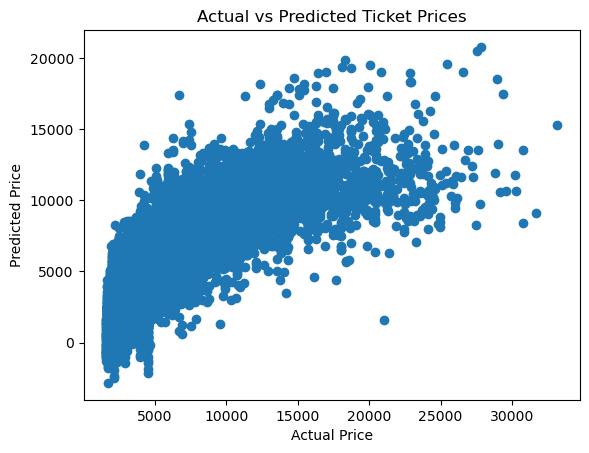

In [16]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Ticket Prices')
plt.show()

## Printing Coefficients of the Linear Model

In [18]:
coefficients = pd.DataFrame(model.coef_, X.columns[:len(model.coef_)], columns=['Coefficient'])
print(coefficients)

                            Coefficient
Unnamed: 0                    -0.006078
duration                      36.633961
days_left                   -143.896502
airline_Air_India           1997.637894
airline_GO_FIRST            1363.566743
...                                 ...
destination_city_Chennai      -2.560553
destination_city_Delhi       -44.522465
destination_city_Hyderabad  -602.960621
destination_city_Kolkata     710.502451
destination_city_Mumbai     -396.792970

[1160 rows x 1 columns]
